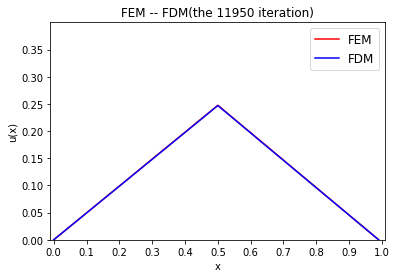

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

nx = 100
dx = 1 / nx
xlab = np.arange(0, 1, 0.01)

fem = np.zeros(nx, dtype=float)
s = np.zeros(nx, dtype=float)
s[int(nx / 2)] = 1
# us = 0
# ue = 0

# with non zeros boundary condition
us = 0.0
ue = 0.0
secs = []
fig, ax = plt.subplots()

# FEM
a = np.zeros([nx, nx], dtype=float)
for i in range(1, nx - 1):
    for j in range(1, nx - 1):
        if i == j:
            a[i][j] = 2 / dx
        elif j == i - 1 or j == i + 1:
            a[i][j] = -1 / dx

asta = np.zeros(nx - 2, dtype=float)
aend = np.zeros(nx - 2, dtype=float)
asta[0] = -1 / dx
aend[nx - 3] = -1 / dx
s[1:nx - 1] = s[1:nx - 1] - us * asta - ue * aend

a_inv = np.linalg.inv(a[1:nx - 1, 1:nx - 1])
fem[1:nx - 1] = a_inv @ s[1:nx - 1]
fem[0] = us
fem[nx - 1] = ue

# FDM
p = np.zeros(nx, dtype=float)
pold = np.zeros(nx, dtype=float)
f = np.zeros(nx, dtype=float)
f[int(nx / 2)] = 1 / dx
for i in range(12000):
    for j in range(1, nx - 1):
        p[j] = 0.5 * (pold[j - 1] + pold[j + 1] + f[j] * dx**2)
    p[0] = 0.0
    p[nx - 1] = 0.0
    pold = p.copy()

    if i % 50 == 0:
        secs.append(pold)

def init():
    ax.set_xlim(0 - 0.01, 1 + 0.01)
    ax.set_ylim(0, 0.4)
    xlim = np.arange(0, 1.1, 0.1)
    ylim = np.arange(0, 0.4, 0.05)
    ax.set_xticks(xlim)
    ax.set_yticks(ylim)
    

def update(frame):
    ax.clear()
    ax.set_xlim(0 - 0.01, 1 + 0.01)
    ax.set_ylim(0, 0.4)
    ax.set_xlabel('x')
    ax.set_ylabel('u(x)')
    xlim = np.arange(0, 1.1, 0.1)
    ylim = np.arange(0, 0.4, 0.05)
    ax.set_xticks(xlim)
    ax.set_yticks(ylim)
    time = frame * 50
    ax.plot(xlab, fem, 'r-', label='FEM')
    ax.plot(xlab, secs[frame], 'b-', label='FDM')
    ax.legend(loc='upper right', fontsize='large')
    ax.set_title("FEM -- FDM(the {:d} iteration)".format(time))
    return fig

anim = FuncAnimation(fig, update, frames=range(len(secs)), blit=False, interval=25, repeat=False, init_func=init)
# plt.show()
anim.save('./pic/FEM_FDM.gif', writer='pillow')

